# Lab Week 3

## Example solution for the ant problem, including plotting

In [5]:
from scipy.integrate import odeint

In [7]:
import numpy as np

Set the parameters

In [8]:
k = 0
mu = 2
r = 0.05

In [9]:
l1 = 2;
l2 = 3;

Set the inital conditions

In [10]:
c0s=[1,1]

Generate an array of test points at which you want to evaluate the system

In [11]:
t = np.linspace(0, 200, 101)

Define the choice function

In [12]:
def p1(c1, c2):
    global k
    global mu
    return (k+c1)**mu/((k+c1)**mu+(k+c2)**mu)

In [13]:
def p2(c1, c2):
    return 1-p1(c1, c2)

With this, the system of ODEs is:

In [14]:
def pheromones(cs, t):
    global q1
    global q2
    global r
    c1, c2 = cs
    dcdt = [
        p1(c1,c2)*1/l1-r*c1,
        p2(c1,c2)*1/l2-r*c2
    ]
    return dcdt

And simply tell scipy to solve it by forward integration

In [15]:
sol = odeint(pheromones, c0s, t, args=())

We can then use the standard plotting library Matplotlib to plot the result:

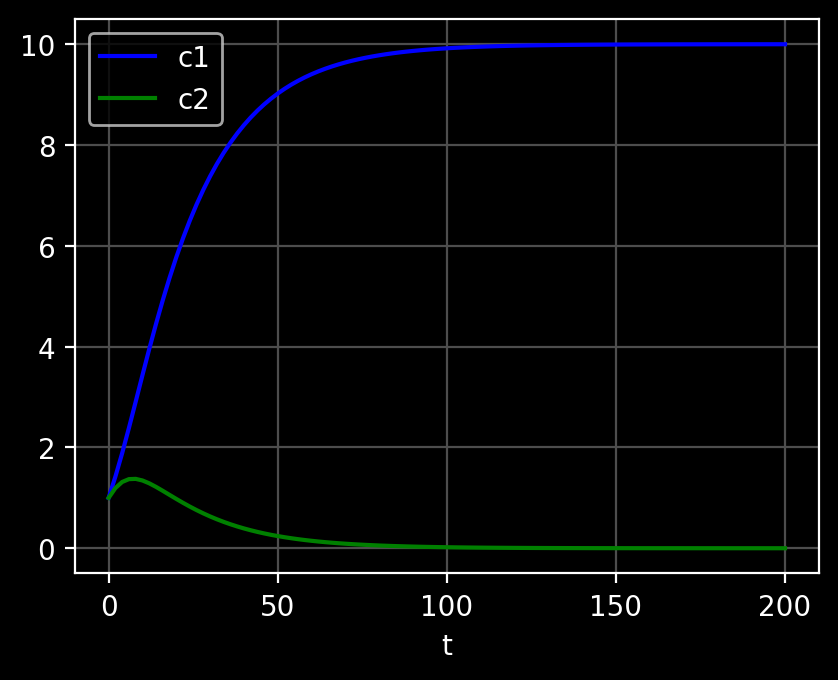

In [16]:
import matplotlib.pyplot as plt
plt.plot(t, sol[:, 0], 'b', label='c1')
plt.plot(t, sol[:, 1], 'g', label='c2')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()